# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [2]:
!pip install requests
!pip install ujson


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Usuário\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Usuário\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import requests 
import json

In [4]:
cotacao = requests.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")
cotacao_dic = cotacao.json()
print(cotacao_dic)


{'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.4654', 'low': '5.4155', 'varBid': '0.0007', 'pctChange': '0.01', 'bid': '5.4286', 'ask': '5.4298', 'timestamp': '1720988340', 'create_date': '2024-07-14 17:19:00'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '5.9574', 'low': '5.8766', 'varBid': '0.0098', 'pctChange': '0.17', 'bid': '5.9176', 'ask': '5.9256', 'timestamp': '1720817968', 'create_date': '2024-07-12 17:59:28'}, 'BTCBRL': {'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '329000', 'low': '318476', 'varBid': '7374', 'pctChange': '2.3', 'bid': '328039', 'ask': '328039', 'timestamp': '1720987672', 'create_date': '2024-07-14 17:07:52'}}


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? 

In [5]:
dolar = "USD: {}".format(cotacao_dic["USDBRL"]["bid"])
euro = "EUR: {}".format(cotacao_dic["EURBRL"]["bid"])
bitcoin = "BitCoin: {}".format(cotacao_dic["BTCBRL"]["bid"])
todos = dolar, euro, bitcoin
print(todos)

('USD: 5.4286', 'EUR: 5.9176', 'BitCoin: 328039')


#### Pegar a cotação dos últimos 30 dias do dólar

In [6]:
cotacao_30dias = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30")
cotacao_dolar_dic2 = cotacao_30dias.json()
#print(cotacao_dolar_dic2)

for item in cotacao_dolar_dic2:
    print(float(item["bid"])) # exibe os valores da cotação do dolar nos ultimos 30 dias 

5.4286
5.4291
5.4291
5.4398
5.4156
5.4192
5.4714
5.4594
5.4592
5.4596
5.4852
5.5523
5.6759
5.6568
5.5925
5.593
5.5014
5.524
5.4511
5.39
5.4301
5.4321
5.4537
5.4269
5.44
5.4245
5.3757
5.3757
5.3757
5.3638


#### Pegar as cotações do BitCoin de 14/Jun/24 a 14/Jul/24

In [20]:
cotacao_dia_14dejunho_julho = requests.get("https://economia.awesomeapi.com.br/json/daily/BTC-BRL/100?start_date=20240614&end_date=20240714") # altere a data conforme preferir meu exemplo ->(começa na data: 2024/06/14 e termina na data:2024/07/14)
cotacao_bitcoin_julho = cotacao_dia_14dejunho_julho.json()
print(cotacao_bitcoin_julho)

[{'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '329000', 'low': '318476', 'varBid': '7374', 'pctChange': '2.3', 'bid': '328039', 'ask': '328039', 'timestamp': '1720987667', 'create_date': '2024-07-14 17:07:47'}, {'high': '326500', 'low': '315540', 'varBid': '7688', 'pctChange': '2.43', 'bid': '323519', 'ask': '323649', 'timestamp': '1720914696'}, {'high': '319517', 'low': '310500', 'varBid': '1721', 'pctChange': '0.55', 'bid': '316009', 'ask': '316025', 'timestamp': '1720828776'}, {'high': '321900', 'low': '311818', 'varBid': '-310', 'pctChange': '-0.1', 'bid': '314254', 'ask': '314370', 'timestamp': '1720742345'}, {'high': '330000', 'low': '311045', 'varBid': '-1923', 'pctChange': '-0.61', 'bid': '314276', 'ask': '314680', 'timestamp': '1720654254'}, {'high': '318397', 'low': '310506', 'varBid': '4013', 'pctChange': '1.28', 'bid': '316731', 'ask': '316731', 'timestamp': '1720569547'}, {'high': '320000', 'low': '300003', 'varBid': '4618', 'pctChange': '1.5

In [30]:
lista_dia_14dejunho_julho = [float(item['bid']) for item in cotacao_bitcoin_julho]
print(lista_dia_14dejunho_julho)
    

[328039.0, 323519.0, 316009.0, 314254.0, 314276.0, 316731.0, 312550.0, 308026.0, 321112.0, 313035.0, 316010.0, 337155.0, 353106.0, 353234.0, 352379.0, 341959.0, 338455.0, 339936.0, 335902.0, 338584.0, 328410.0, 346500.0, 351873.0, 350486.0, 355587.0, 354412.0, 356200.0, 361475.0, 361530.0, 358913.0, 357802.0]


#### Gráfico com as cotações do BitCoin

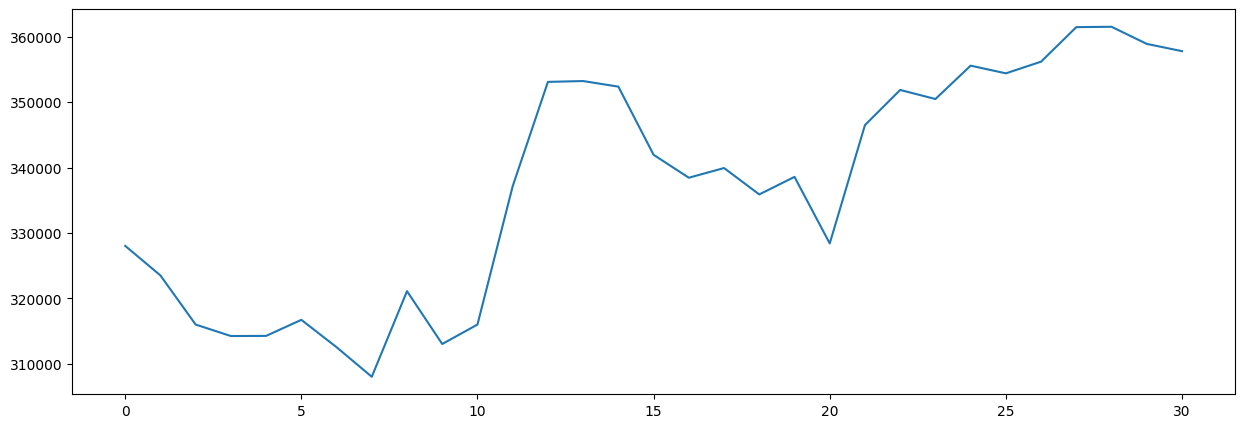

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_dia_14dejunho_julho)
plt.show()
